In [ ]:
# California Intro


In [399]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
from pygris import counties
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap


In [401]:
# Get the default TIGER/Line file for counties in California
ca_tiger = counties(state="CA", cache=True)

Using the default year of 2021
Using FIPS code '06' for input 'CA'


In [403]:
print(ca_tiger.columns)

Index(['STATEFP', 'COUNTYFP', 'COUNTYNS', 'GEOID', 'NAME', 'NAMELSAD', 'LSAD',
       'CLASSFP', 'MTFCC', 'CSAFP', 'CBSAFP', 'METDIVFP', 'FUNCSTAT', 'ALAND',
       'AWATER', 'INTPTLAT', 'INTPTLON', 'geometry'],
      dtype='object')


In [407]:
# Get the current working directory
current_directory = os.getcwd()

# Construct the file path by joining the current directory with the relative path
csv_path = os.path.join(current_directory, 'Geoprogram', 'monitor.csv')

# Print the file path
print("CSV Path:", csv_path)

# Read the shapefile using the constructed file path
df = pd.read_csv(csv_path)


CSV Path: /home/bd2a404a-d050-4548-bcf4-7bee4e916ab9/Geoprogram/monitor.csv


In [409]:

# Define the list of parameters and corresponding colors
parameters_colors = {
    'Sulfur dioxide': 'red',
    'Ozone': 'blue',
    'PM2.5 - Local Conditions': 'green',
    'Carbon monoxide': 'purple',
    'Nitric oxide (NO)': 'orange'
}

In [411]:
# Filter the DataFrame for monitors in California
california_df = df[df['State Name'].isin(['California'])]


In [413]:
display(california_df)



,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,75th Percentile,50th Percentile,10th Percentile,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
2646,6,1,7,42601,1,37.687526,-121.784217,WGS84,Nitric oxide (NO),1 HOUR,...,0.400,-0.500,-0.900,Livermore,793 Rincon Ave.,California,Alameda,Livermore,"San Francisco-Oakland-Hayward, CA",2023-10-23
2647,6,1,7,42602,1,37.687526,-121.784217,WGS84,Nitrogen dioxide (NO2),1 HOUR,...,19.900,10.600,2.700,Livermore,793 Rincon Ave.,California,Alameda,Livermore,"San Francisco-Oakland-Hayward, CA",2023-10-23
2648,6,1,7,42602,1,37.687526,-121.784217,WGS84,Nitrogen dioxide (NO2),1 HOUR,...,6.200,2.900,0.900,Livermore,793 Rincon Ave.,California,Alameda,Livermore,"San Francisco-Oakland-Hayward, CA",2023-10-23
2649,6,1,7,42603,1,37.687526,-121.784217,WGS84,Oxides of nitrogen (NOx),1 HOUR,...,6.100,2.600,0.200,Livermore,793 Rincon Ave.,California,Alameda,Livermore,"San Francisco-Oakland-Hayward, CA",2023-10-23
2650,6,1,7,44201,1,37.687526,-121.784217,WGS84,Ozone,1 HOUR,...,0.047,0.042,0.034,Livermore,793 Rincon Ave.,California,Alameda,Livermore,"San Francisco-Oakland-Hayward, CA",2023-10-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8036,6,113,1003,88101,3,38.661210,-121.732690,WGS84,PM2.5 - Local Conditions,24-HR BLK AVG,...,5.200,3.900,2.000,Woodland-Gibson Road,"41929 E. GIBSON ROAD, WOODLAND",California,Yolo,Woodland,"Sacramento--Roseville--Arden-Arcade, CA",2023-08-16
8037,6,113,1003,88101,3,38.661210,-121.732690,WGS84,PM2.5 - Local Conditions,24-HR BLK AVG,...,5.200,3.900,2.000,Woodland-Gibson Road,"41929 E. GIBSON ROAD, WOODLAND",California,Yolo,Woodland,"Sacramento--Roseville--Arden-Arcade, CA",2023-08-16
8038,6,113,1003,88101,3,38.661210,-121.732690,WGS84,PM2.5 - Local Conditions,24-HR BLK AVG,...,5.200,3.900,2.000,Woodland-Gibson Road,"41929 E. GIBSON ROAD, WOODLAND",California,Yolo,Woodland,"Sacramento--Roseville--Arden-Arcade, CA",2023-08-16
8039,6,113,2001,81102,1,38.571460,-121.525790,WGS84,PM10 Total 0-10um STP,24 HOUR,...,18.000,12.000,4.000,West Sacramento-15th Street,"132 15TH ST., WEST SACRAMENTO",California,Yolo,West Sacramento,"Sacramento--Roseville--Arden-Arcade, CA",2023-10-06


<Axes: >

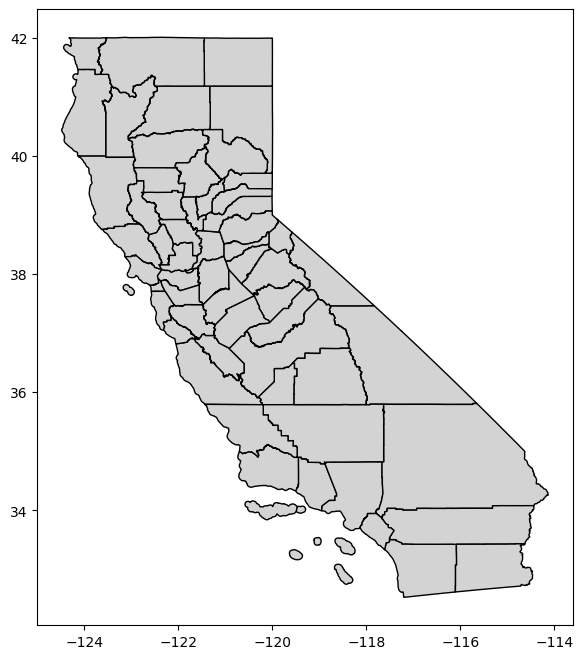

In [313]:
# Plot the map of California using ca_tiger directly
fig, ax = plt.subplots(figsize=(10, 8))
ca_tiger.plot(ax=ax, color='lightgray', edgecolor='black')

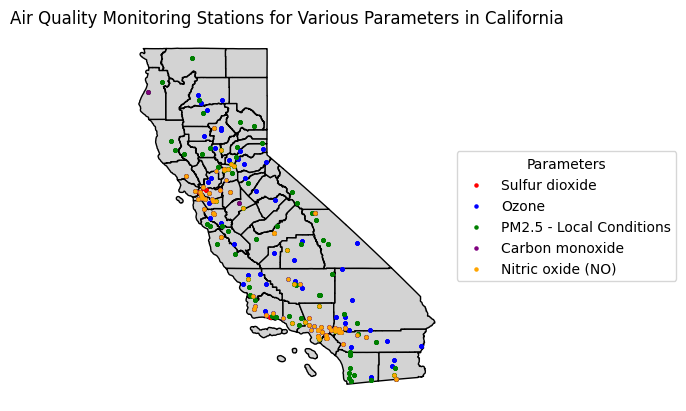

In [314]:
# Create an empty plot
fig, ax = plt.subplots()
ca_tiger.plot(ax=ax, color='lightgray', edgecolor='black')
# Iterate through each parameter and plot points on the map

for parameter, color in parameters_colors.items():
    # Filter the DataFrame for the current parameter
    filtered_df = california_df[california_df['Parameter Name'] == parameter]

    # Convert the filtered DataFrame to a GeoDataFrame with Point geometries
    geometry = [Point(xy) for xy in zip(filtered_df['Longitude'], filtered_df['Latitude'])]
    crs = 'EPSG:4269'  # NAD 83
    gdf_points = gpd.GeoDataFrame(filtered_df, geometry=geometry, crs=crs)

    # Plot the GeoDataFrame as points with specified color and label
    gdf_points.plot(ax=ax, color=color, markersize=5, label=parameter)

# Remove ticks from both axes
ax.set_xticks([])
ax.set_yticks([])
# Turn off the entire axis
ax.set_axis_off()

# Add legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Parameters')

plt.title('Air Quality Monitoring Stations for Various Parameters in California')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


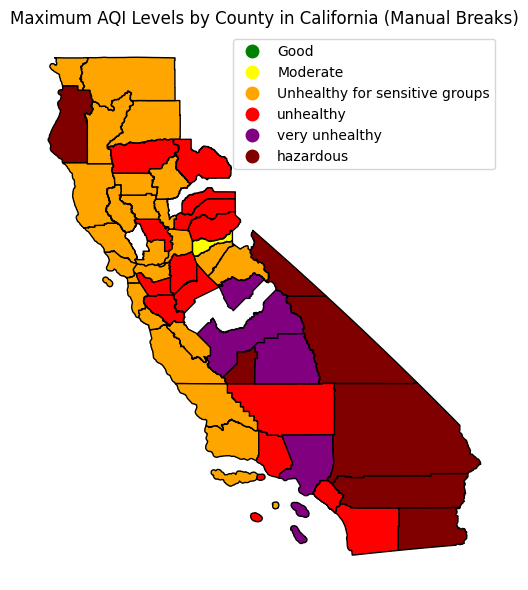

In [371]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Assuming ca_tiger is retrieved using a function or method
# Load air quality data from CSV
california_df = pd.read_csv('/home/bd2a404a-d050-4548-bcf4-7bee4e916ab9/Geoprogram/concentration.csv')

# Merge California counties shapefile with air quality data from DataFrame
county_aqi = ca_tiger.merge(california_df, left_on='NAME', right_on='County')

# Define manual breaks and corresponding colors
bins = [0, 50, 100, 150, 200, 300]
colors = ['green', 'yellow', 'orange', 'red', 'purple', 'maroon']

# Create a colormap using the specified colors
cmap_custom = ListedColormap(colors)

# Plot choropleth map based on AQI levels using manual breaks and custom colormap
fig, axes = plt.subplots(1, 1, figsize=(10, 6))

# Plot the geometries (counties) using the respective data column and manual breaks scheme
county_aqi.plot(column='Max AQI', ax=axes, legend=True,
                cmap=cmap_custom, edgecolor='black',
                scheme='UserDefined', classification_kwds={'bins': bins[:-1]},
                legend_kwds={'labels': ['Good', 'Moderate', 'Unhealthy for sensitive groups', 'unhealthy', 'very unhealthy', 'hazardous']})

# Set title and axis off
axes.set_title('Maximum AQI Levels by County in California')
axes.axis('off')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()




/home/bd2a404a-d050-4548-bcf4-7bee4e916ab9/.local/lib/python3.11/site-packages/mapclassify/classifiers.py:1592: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 4.
  self.bins = quantile(y, k=k)
/home/bd2a404a-d050-4548-bcf4-7bee4e916ab9/.local/lib/python3.11/site-packages/mapclassify/classifiers.py:1592: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 2.
  self.bins = quantile(y, k=k)
/home/bd2a404a-d050-4548-bcf4-7bee4e916ab9/.local/lib/python3.11/site-packages/mapclassify/classifiers.py:1592: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 2.
  self.bins = quantile(y, k=k)


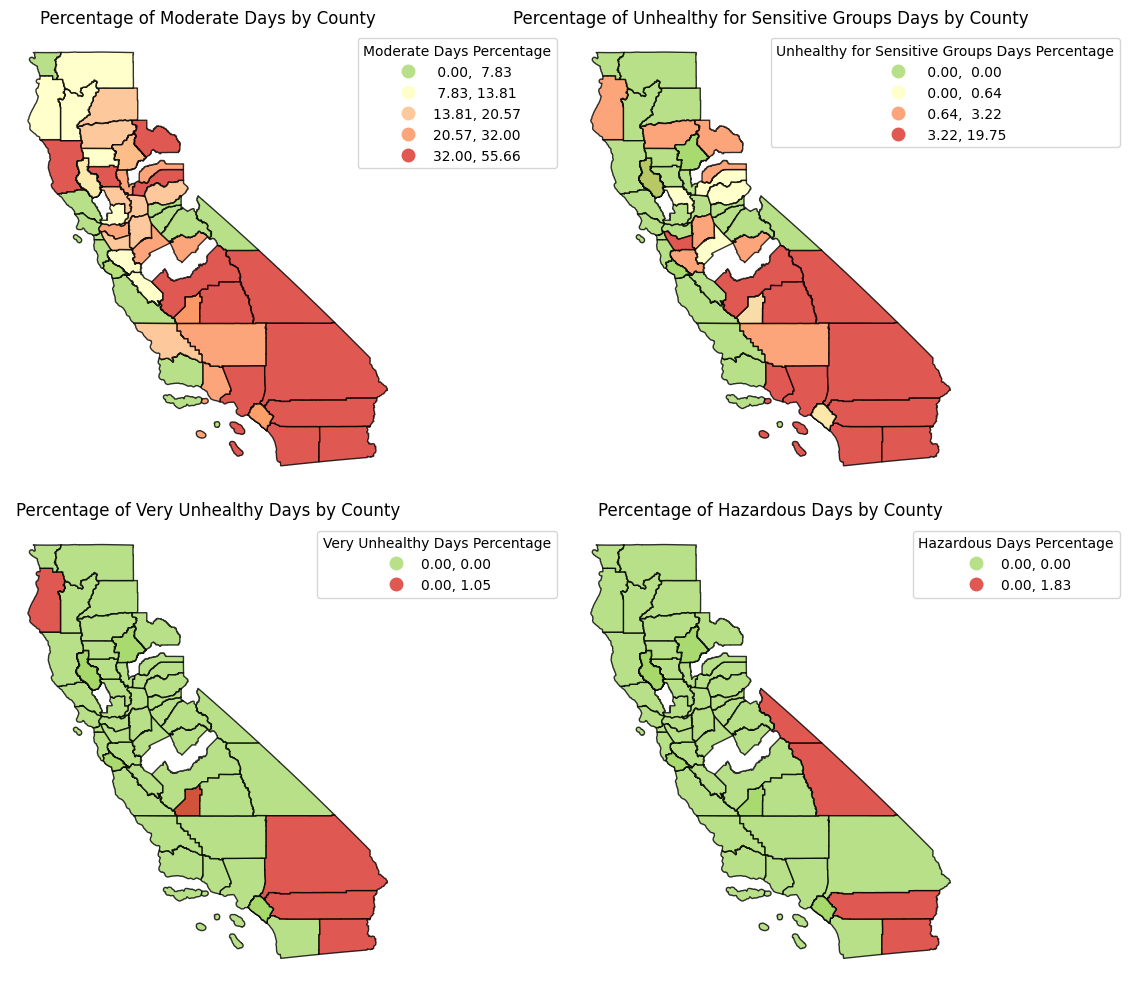

In [316]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Assuming ca_tiger is retrieved using a function or method
# Load air quality data from CSV
california_df = pd.read_csv('/home/bd2a404a-d050-4548-bcf4-7bee4e916ab9/Geoprogram/concentration.csv')

# Merge California counties shapefile with air quality data from DataFrame
county_aqi = ca_tiger.merge(california_df, left_on='NAME', right_on='County')

# Calculate percentages for each category based on Days with AQI
categories = ['Moderate Days', 'Unhealthy for Sensitive Groups Days', 'Very Unhealthy Days', 'Hazardous Days']
total_days_aqi = county_aqi['Days with AQI']
for category in categories:
    county_aqi[f'{category} Percentage'] = (county_aqi[category] / total_days_aqi) * 100

# Create a custom colormap with red as the maximum color
colors = ['#a6d96a', '#ffffbf', '#fdbb84', '#fc8d59', '#d73027']  # Red added at the end
cmap_custom = ListedColormap(colors)

# Plot choropleth maps for each category with individual legends and custom colormap
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for category, ax in zip(categories, axes.flatten()):
    county_aqi.plot(column=f'{category} Percentage', cmap=cmap_custom, ax=ax, legend=True, scheme='quantiles', k=5, edgecolor='black', alpha=0.8)
    ax.set_title(f'Percentage of {category} by County')
    ax.axis('off')
    legend = ax.get_legend()
    legend.set_title(f'{category} Percentage')
    legend.set_bbox_to_anchor((1.4, 1))  # Adjust the values (x, y) as needed to position the legend

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


In [427]:
# Filter rows based on parameter names
filtered_df = california_df[california_df['Parameter Name'].isin(['PM2.5 - Local Conditions', 'NO', 'Ozone', 'CO','Sulfur dioxide'])]
print(filtered_df)


      State Code  County Code  Site Num  Parameter Code  POC   Latitude  \
2650           6            1         7           44201    1  37.687526   
2651           6            1         7           44201    1  37.687526   
2652           6            1         7           44201    1  37.687526   
2653           6            1         7           44201    1  37.687526   
2655           6            1         7           88101    3  37.687526   
...          ...          ...       ...             ...  ...        ...   
8034           6          113      1003           88101    3  38.661210   
8035           6          113      1003           88101    3  38.661210   
8036           6          113      1003           88101    3  38.661210   
8037           6          113      1003           88101    3  38.661210   
8038           6          113      1003           88101    3  38.661210   

       Longitude  Datum            Parameter Name          Sample Duration  \
2650 -121.784217  WGS

In [435]:
import pandas as pd

# Assuming you have the filtered_df DataFrame

# Create a filename (replace 'air_quality_data.csv' with your desired name)
filename = 'air_quality_data.csv'

# Save the DataFrame to a CSV file
filtered_df.to_csv(filename, index=False)

print(f"Data successfully saved to: {filename}")


Data successfully saved to: air_quality_data.csv
